In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Load the updated dataset 
data = pd.read_csv(r"finaldatagyprep.csv")

In [3]:
# Drop rows with null values
data = data.dropna(how='any')

In [4]:
data.head()

,DESTINATION,SERVICE_NAME,RATING,WEIGHTAGE,COUNT,CATEGORY,CHECK_VALUE
0,"Mumbai, Maharashtra, India",Juhu beach,4.0,9.0,340,Attraction,12240.0
1,"Mumbai, Maharashtra, India",Siddhivinayak Temple,4.8,9.0,340,Attraction,14688.0
2,"Mumbai, Maharashtra, India",Haji Ali Dargah,4.4,9.0,336,Attraction,13305.6
3,"Mumbai, Maharashtra, India",Gateway of India; Mumbai,4.6,9.0,329,Attraction,13620.6
4,"Mumbai, Maharashtra, India",Prince of Wales Museum,4.5,8.0,188,Attraction,6768.0


In [5]:
data.tail()

,DESTINATION,SERVICE_NAME,RATING,WEIGHTAGE,COUNT,CATEGORY,CHECK_VALUE
51106,Dubai - United Arab Emirates,8PM-8AM,0.0,4.0,2979,Attraction,0.0
51107,Dubai - United Arab Emirates,0,0.0,3.0,3864,Attraction,0.0
51108,Dubai - United Arab Emirates,Leave Airport,0.0,0.0,3864,Attraction,0.0
51109,Dubai - United Arab Emirates,"restaurant,food",4.5,0.0,4583,Hotel,0.0
51110,Dubai - United Arab Emirates,"restaurant,food",4.1,0.0,4583,Hotel,0.0


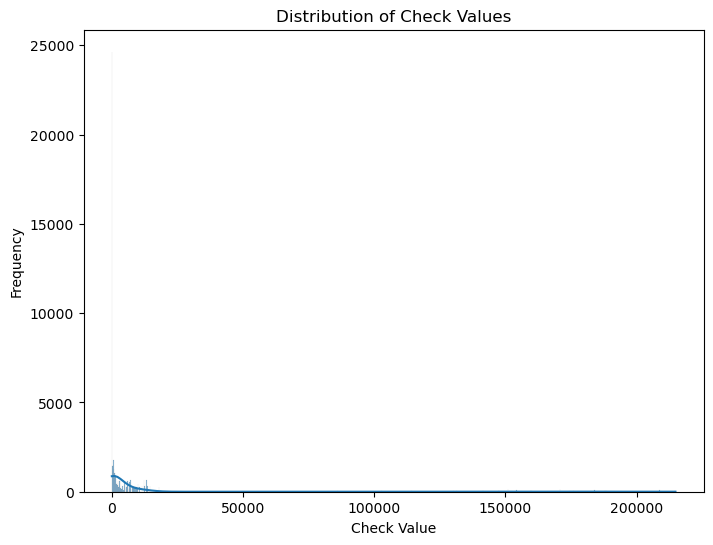

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['CHECK_VALUE'], kde=True)
plt.xlabel("Check Value")
plt.ylabel("Frequency")
plt.title("Distribution of Check Values")
plt.show()

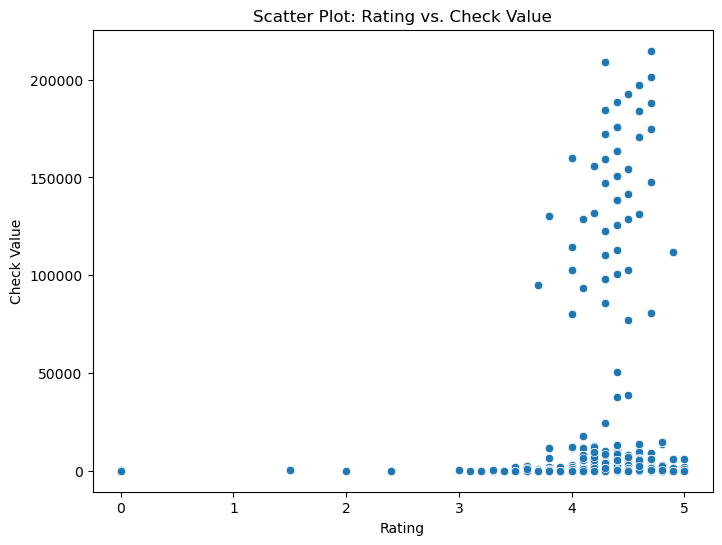

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RATING', y='CHECK_VALUE', data=data)
plt.xlabel("Rating")
plt.ylabel("Check Value")
plt.title("Scatter Plot: Rating vs. Check Value")
plt.show()

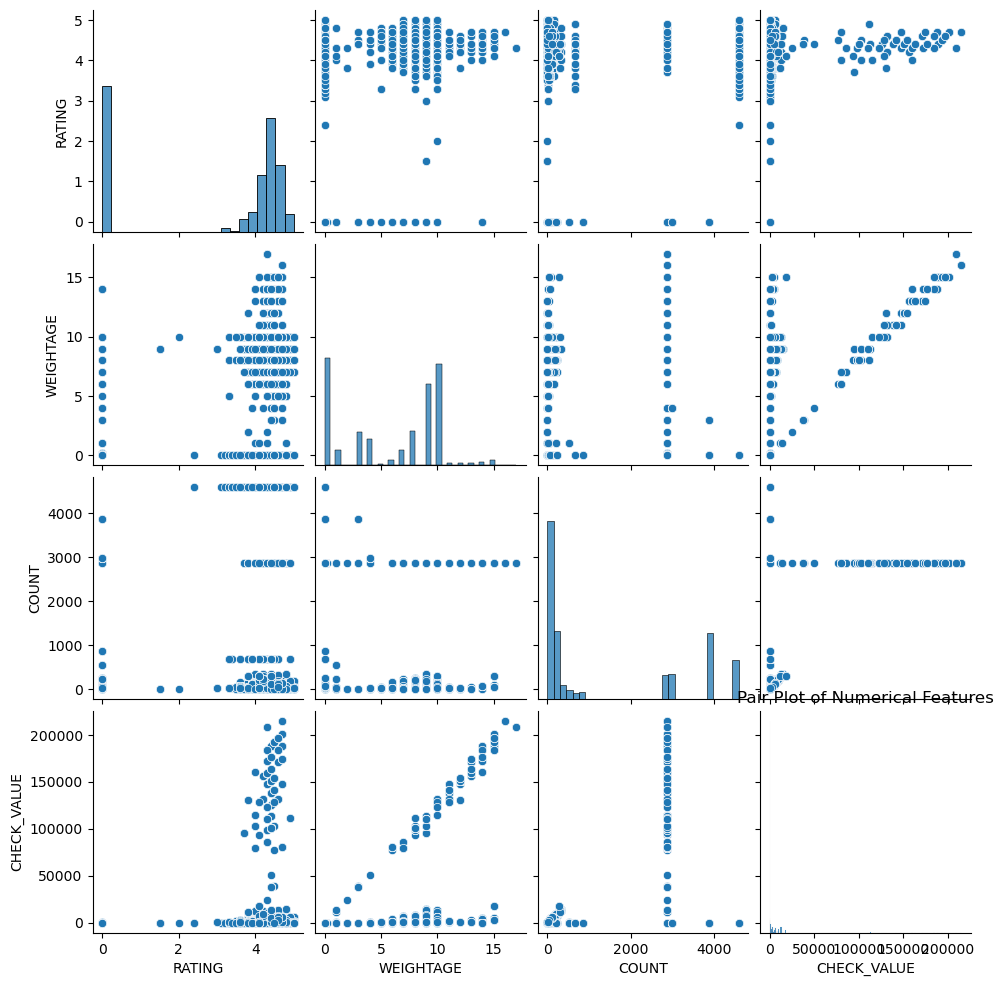

In [8]:
sns.pairplot(data[['RATING', 'WEIGHTAGE', 'COUNT', 'CHECK_VALUE']])
plt.title("Pair Plot of Numerical Features")
plt.show()


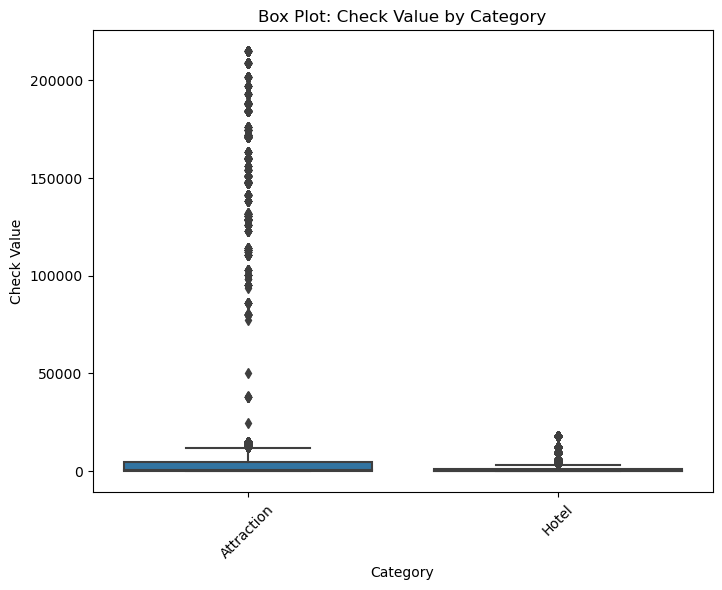

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CATEGORY', y='CHECK_VALUE', data=data)
plt.xlabel("Category")
plt.ylabel("Check Value")
plt.title("Box Plot: Check Value by Category")
plt.xticks(rotation=45)
plt.show()


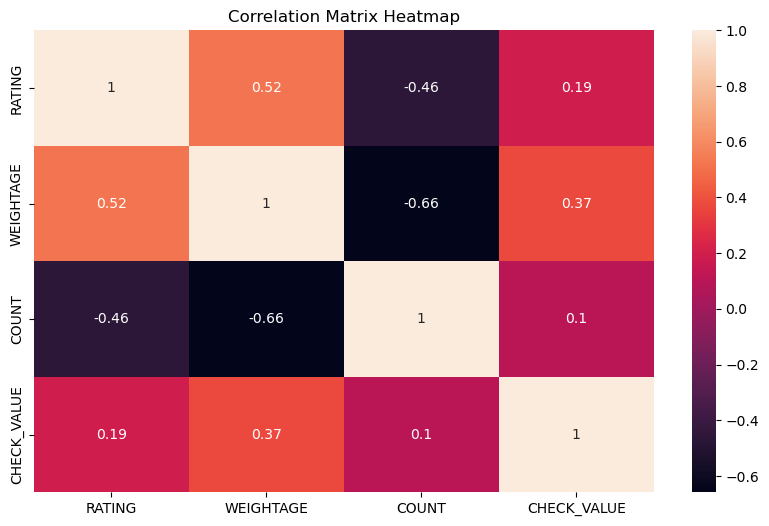

In [10]:
correlation_matrix = data[['RATING', 'WEIGHTAGE', 'COUNT', 'CHECK_VALUE']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


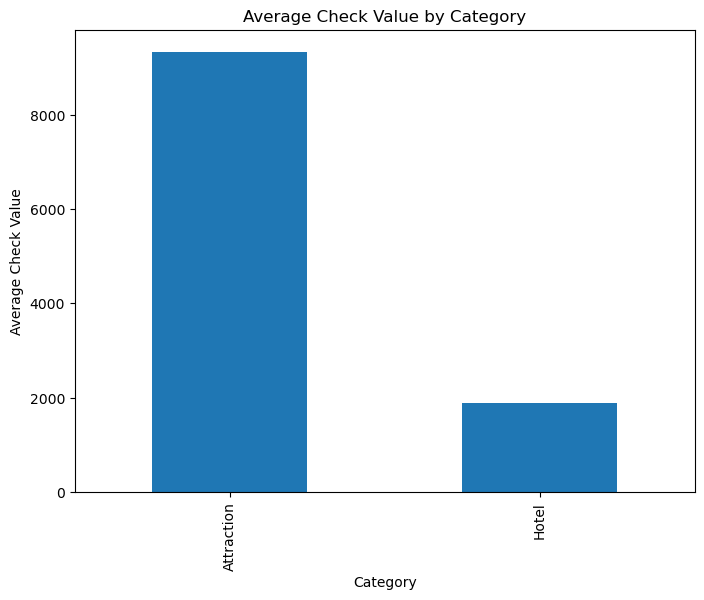

In [11]:
category_avg_check = data.groupby('CATEGORY')['CHECK_VALUE'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_avg_check.plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Average Check Value")
plt.title("Average Check Value by Category")
plt.show()


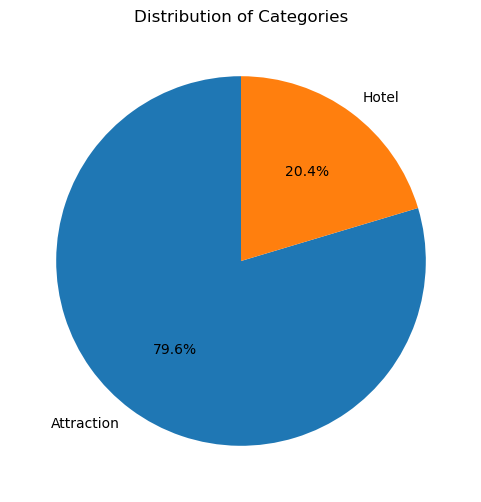

In [12]:
category_counts = data['CATEGORY'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.show()


In [13]:
# Encode categorical features like DESTINATION and CATEGORY
label_encoder_destination = LabelEncoder()
data['DESTINATION_ENCODED'] = label_encoder_destination.fit_transform(data['DESTINATION'].str.strip())  # Strip whitespace

In [14]:
label_encoder_service = LabelEncoder()
data['SERVICE_NAME_ENCODED'] = label_encoder_service.fit_transform(data['SERVICE_NAME'].str.strip())  # Strip whitespace

In [15]:
# Create mappings for encoded values to original labels
destination_mapping = dict(zip(data['DESTINATION_ENCODED'], data['DESTINATION']))
service_mapping = dict(zip(data['SERVICE_NAME_ENCODED'], data['SERVICE_NAME']))

In [16]:
# One-hot encode the 'CATEGORY' feature
category_encoder = OneHotEncoder()
category_encoded = category_encoder.fit_transform(data[['CATEGORY']]).toarray()
category_columns = category_encoder.get_feature_names_out(['CATEGORY'])
data[category_columns] = pd.DataFrame(category_encoded, columns=category_columns)

In [17]:
# Define your input features (X) and target variable (y)
X = data[['DESTINATION_ENCODED', 'SERVICE_NAME_ENCODED', 'RATING', 'WEIGHTAGE', 'COUNT'] + list(category_columns)]
y = data['CHECK_VALUE']

In [18]:
# Train a KNN Regressor model
k = 3  # You can adjust the value of k as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [19]:
X

,DESTINATION_ENCODED,SERVICE_NAME_ENCODED,RATING,WEIGHTAGE,COUNT,CATEGORY_Attraction,CATEGORY_Hotel
0,84,466,4.0,9.0,340,1.0,0.0
1,84,878,4.8,9.0,340,1.0,0.0
2,84,372,4.4,9.0,336,1.0,0.0
3,84,322,4.6,9.0,329,1.0,0.0
4,84,769,4.5,8.0,188,1.0,0.0
...,...,...,...,...,...,...,...
51106,29,8,0.0,4.0,2979,1.0,0.0
51107,29,0,0.0,3.0,3864,1.0,0.0
51108,29,573,0.0,0.0,3864,1.0,0.0
51109,29,1145,4.5,0.0,4583,0.0,1.0


In [20]:
y

0        12240.0
1        14688.0
2        13305.6
3        13620.6
4         6768.0
          ...   
51106        0.0
51107        0.0
51108        0.0
51109        0.0
51110        0.0
Name: CHECK_VALUE, Length: 51111, dtype: float64

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 17080.666702098726
R-squared (R2) Score: 0.9999814197796688
Mean Absolute Error (MAE): 2.750014672796804


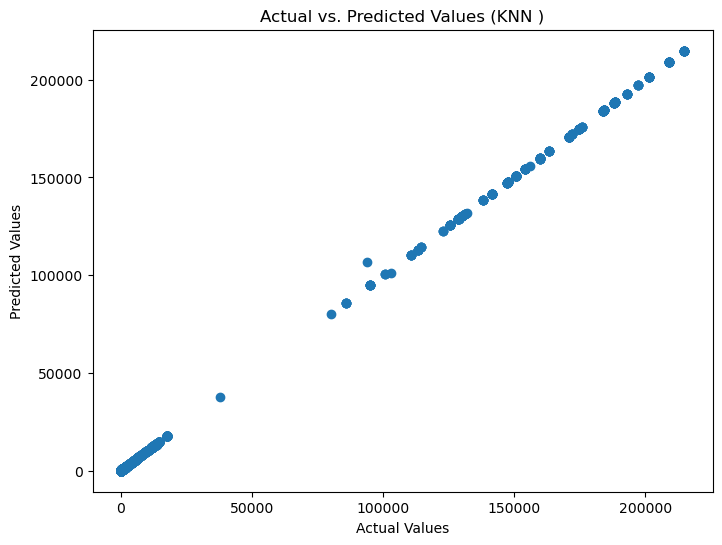

In [22]:
# Assuming you have a KNN model 'knn_model' and your test data 'X_test' and 'y_test'
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (KNN )")
plt.show()


In [23]:
data.head()

,DESTINATION,SERVICE_NAME,RATING,WEIGHTAGE,COUNT,CATEGORY,CHECK_VALUE,DESTINATION_ENCODED,SERVICE_NAME_ENCODED,CATEGORY_Attraction,CATEGORY_Hotel
0,"Mumbai, Maharashtra, India",Juhu beach,4.0,9.0,340,Attraction,12240.0,84,466,1.0,0.0
1,"Mumbai, Maharashtra, India",Siddhivinayak Temple,4.8,9.0,340,Attraction,14688.0,84,878,1.0,0.0
2,"Mumbai, Maharashtra, India",Haji Ali Dargah,4.4,9.0,336,Attraction,13305.6,84,372,1.0,0.0
3,"Mumbai, Maharashtra, India",Gateway of India; Mumbai,4.6,9.0,329,Attraction,13620.6,84,322,1.0,0.0
4,"Mumbai, Maharashtra, India",Prince of Wales Museum,4.5,8.0,188,Attraction,6768.0,84,769,1.0,0.0


In [24]:
data.tail()

,DESTINATION,SERVICE_NAME,RATING,WEIGHTAGE,COUNT,CATEGORY,CHECK_VALUE,DESTINATION_ENCODED,SERVICE_NAME_ENCODED,CATEGORY_Attraction,CATEGORY_Hotel
51106,Dubai - United Arab Emirates,8PM-8AM,0.0,4.0,2979,Attraction,0.0,29,8,1.0,0.0
51107,Dubai - United Arab Emirates,0,0.0,3.0,3864,Attraction,0.0,29,0,1.0,0.0
51108,Dubai - United Arab Emirates,Leave Airport,0.0,0.0,3864,Attraction,0.0,29,573,1.0,0.0
51109,Dubai - United Arab Emirates,"restaurant,food",4.5,0.0,4583,Hotel,0.0,29,1145,0.0,1.0
51110,Dubai - United Arab Emirates,"restaurant,food",4.1,0.0,4583,Hotel,0.0,29,1145,0.0,1.0


Text(0.5, 1.0, 'Regression plot between weightage anD CHECKVALUE')

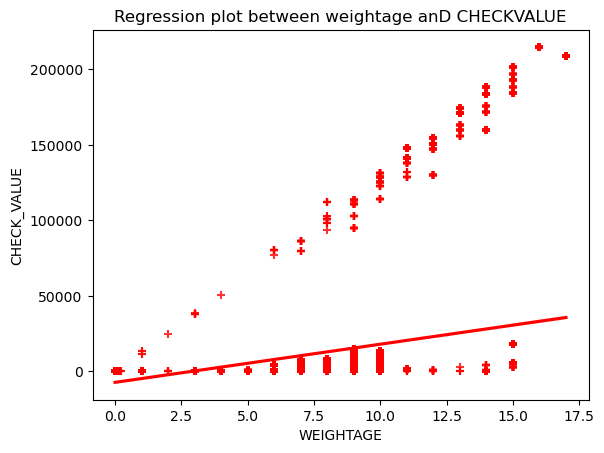

In [25]:
sns.regplot(x="WEIGHTAGE",y="CHECK_VALUE",data=data,color="RED",marker="+")
plt.title("Regression plot between weightage anD CHECKVALUE")

Text(0.5, 1.0, 'Regression plot between weightage and CHECKVALUE')

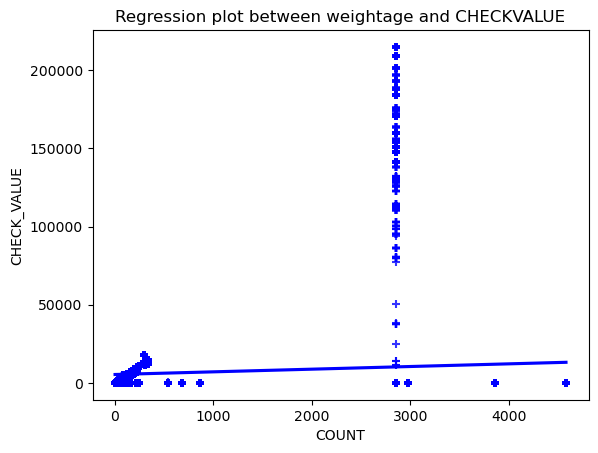

In [26]:
sns.regplot(x="COUNT",y="CHECK_VALUE",data=data,color="BLUE",marker="+")
plt.title("Regression plot between weightage and CHECKVALUE")

Text(0.5, 1.0, 'Regression plot between weightage and CHECKVALUE')

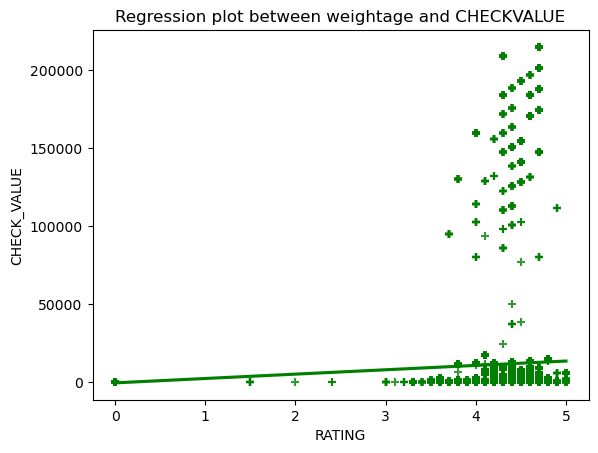

In [27]:
sns.regplot(x="RATING",y="CHECK_VALUE",data=data,color="green",marker="+")
plt.title("Regression plot between weightage and CHECKVALUE")

In [28]:
import matplotlib.pyplot as plt

# Step 1: Count the number of occurrences for each unique 'DESTINATION'
place_counts = data['DESTINATION'].value_counts()
count=0
# List unique destination names
unique_destinations = place_counts.index.tolist()
print("Unique Destination Names:")
for destination in unique_destinations:
    print(destination)
    count=count+1

# Get user input for the destination name
print(count)
input_place_name = input("Enter a destination name: ")

Unique Destination Names:
Mumbai, Maharashtra, India
Goa, India
Mussoorie, Uttarakhand, India
Mcleodganj, Himachal Pradesh, India
Chennai, Tamil Nadu, India
Dubai - United Arab Emirates
Mysore, Karnataka, India
Mauritius
Chikmagalur, Karnataka, India
Shimla, Himachal Pradesh, India
Udupi, Karnataka, India
Dharamshala, Himachal Pradesh, India
Jaipur, Rajasthan, India
Hyderabad, Telangana, India
Ooty - Masinagudi - Mudumalai, Tamil Nadu, India
Udaipur, Rajasthan, India
Andaman and Nicobar Islands, India
Madikeri - Coorg, Karnataka, India
Jaisalmer, Rajasthan, India
Malé, Maldives
Alleppey, Kerala, India
Pune, Maharashtra, India
Lansdowne, Uttarakhand, India
Alappuzha, Kerala, India
Gulmarg, Jammu & Kashmir, India
Shirdi, Maharashtra, India
Rameswaram, Tamil Nadu, India
Munnar, Kerala, India
Kolkata, West Bengal, India
Agra, Uttar Pradesh, India
Manali, Himachal Pradesh, India
Nainital, Uttarakhand, India
Pondicherry, India
Shillong, Meghalaya, India
Auckland, New Zealand
Hampi, Karnataka

In [29]:
if input_place_name in destination_mapping.values():
    encoded_place_name = label_encoder_destination.transform([input_place_name])[0]

    # Filter the data for the specified DESTINATION
    filtered_data = data[data['DESTINATION_ENCODED'] == encoded_place_name].copy()
    filtered_data['PREDICTED_CHECK_VALUE'] = model.predict(filtered_data[['DESTINATION_ENCODED', 'SERVICE_NAME_ENCODED', 'RATING', 'WEIGHTAGE', 'COUNT'] + list(category_columns)])

    if not filtered_data.empty:
        # Filter out rows with a predicted check value of zero
        non_zero_data = filtered_data[filtered_data['PREDICTED_CHECK_VALUE'] > 0]

        # Sort by Predicted CHECK_VALUE in decreasing order
        sorted_data = non_zero_data.sort_values(by='PREDICTED_CHECK_VALUE', ascending=False)

        # Maintain a set to track printed services
        printed_services = set()

        for index, row in sorted_data.iterrows():
            service_name = row['SERVICE_NAME']
            if service_name not in printed_services:
                # Print the service and its respective category
                print("Service:", service_name)
                # Find the category column with a value of 1
                category_column = category_columns[np.where(row[category_columns] == 1)]
                if len(category_column) > 0:
                    # Extract the category name from the column name
                    category_name = category_column[0].split('_')[1]
                    print("Category:", category_name)
                print("Predicted Check Value:", row['PREDICTED_CHECK_VALUE'])
                print("\n")
                # Add the service to the printed set to avoid repetitions
                printed_services.add(service_name)
    else:
        print(f"No services found for {input_place_name}")
else:
    print(f"Place {input_place_name} not found in the dataset.")

Service: futureservicedummy
Category: Attraction
Predicted Check Value: 184276.5


Service: Superior Non Lake Facing
Category: Hotel
Predicted Check Value: 5227.5


Service: Fortune Resort Grace Mussoorie
Category: Hotel
Predicted Check Value: 4662.0


Service: Fortune Resort Heevan Srinagar - Member ITC's Hotel Group
Category: Hotel
Predicted Check Value: 3483.0


Service: Onake Abbi Falls
Category: Attraction
Predicted Check Value: 3300.0


Service: Manipal Lake
Category: Attraction
Predicted Check Value: 3168.0


Service: Agumbe Rainforest Research Station
Category: Attraction
Predicted Check Value: 2982.0


Service: Wild Planet
Category: Attraction
Predicted Check Value: 2444.0


Service: JKR Resort and Spa
Category: Hotel
Predicted Check Value: 2203.2


Service: Nirvana Guest House
Category: Hotel
Predicted Check Value: 1760.0


Service: Havelock Island Beach Resort
Category: Hotel
Predicted Check Value: 1739.3


Service: Mudumalai National Park
Category: Attraction
Predicted Chec

In [30]:
import pickle

# Save the model to a pickle file
with open("knn_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [31]:
pickled_model = pickle.load(open('knn_model.pkl', 'rb'))
pickled_model.predict(X_test)

array([6090. , 5944.4,    0. , ...,    0. , 9894.6, 9660. ])